<a href="https://colab.research.google.com/github/RamadhikaS/CapstoneUASBengkod/blob/main/BengkodUAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nama : Ramadhika Surya Purmiadanu
#NIM    : A11.2022.14116

In [1]:
import pandas as pd #mengimport panda dengan rujukan pd
import numpy as np #mengimport numpy dengan rujukan np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
file_path = "/content/drive/MyDrive/ObesityDataSet.csv"
df = pd.read_csv(file_path) #syntax untuk membaca keseluruhan dataset yang dimana akan membaca dataset dari drive

In [36]:
df.head() #saya menampilkan 5 data awal, sekalian memastikan ternyata code nya berjalan dan bisa menampilkan data terlebih dahulu

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.info() #Menampilkan informasi umum tentang dataset (kolom, tipe data, null value)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [6]:
print(df.dtypes)

Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


In [7]:
# Daftar kolom yang seharusnya numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi kolom-kolom tersebut ke numerik
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek kembali apakah muncul missing value setelah konversi
print(df[numeric_cols].isnull().sum())

# Jika ada yang NaN, kamu bisa drop
df.dropna(subset=numeric_cols, inplace=True)

Age       22
Height    22
Weight    19
FCVC      18
NCP       22
CH2O      15
FAF       19
TUE       15
dtype: int64


In [8]:
df.describe() # Menampilkan statistik deskriptif dari dataset

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000
mean,24.724016,1.707991,88.765772,2.444080,2.730535,2.038373,1.080414,0.685065
std,8.504616,0.118861,36.737095,0.647913,0.992673,0.745814,1.167219,0.726979
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.975735,1.630000,66.000000,2.000000,2.661818,1.590922,0.128856,0.000000
50%,22.766227,1.703202,83.014033,2.392665,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.770202,108.015907,3.000000,3.000000,2.498811,1.687877,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [9]:
#saya mengecek apakah ada data yang duplikat yang harus dibersihkan
#mengecek dan/atau menghapus duplikat data
print("Jumlah duplikat sebelum dibersihkan:", df.duplicated().sum())

# Menghapus duplikat jika ada
df = df.drop_duplicates()

print("Jumlah duplikat setelah dibersihkan:", df.duplicated().sum())

Jumlah duplikat sebelum dibersihkan: 18
Jumlah duplikat setelah dibersihkan: 0


In [10]:
# Mengecek unique value dari setiap kolom
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("")

Unique values in 'Age':
[21.       23.       27.       ... 22.524036 24.361936 23.664709]

Unique values in 'Gender':
['Female' 'Male' '?' nan]

Unique values in 'Height':
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Unique values in 'Weight':
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

Unique values in 'CALC':
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Unique values in 'FAVC':
['no' 'yes' '?' nan]

Unique values in 'FCVC':
[2.         3.         1.         8.14899274 8.42397393 2.450218
 2.880161   2.00876    2.596579   2.591439   2.392665   1.123939
 2.027574   2.658112   2.88626    2.714447   2.750715   1.4925
 2.059138   2.596364   2.767731   2.815157   2.737762   2.524428
 2.971574   1.0816     1.270448   2.959658   2.725282   2.44004
 2.432302   2.592247   2.449267   2.929889   2.015258   1.031149
 1.592183   1.21498    1.522001   2.703436   2.362918   2.14084
 2.336044   1.813234   2.724285   2.71897    1.133844   1.757466
 2.9

In [11]:
# Mengganti "?" dengan NaN
df.replace("?", np.nan, inplace=True)

In [12]:
# Mengecek jumlah missing value di setiap kolom
print("\nJumlah missing value setelah replace '?':")
print(df.isnull().sum())


Jumlah missing value setelah replace '?':
Age                                0
Gender                            22
Height                             0
Weight                             0
CALC                              20
FAVC                              22
FCVC                               0
NCP                                0
SCC                               18
SMOKE                             13
CH2O                               0
family_history_with_overweight    23
FAF                                0
TUE                                0
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [13]:
#menghapus baris yang memiliki missing value
df.dropna(inplace=True)

In [14]:
#mengecek kembali jumlah missing value di setiap kolom
print("\nJumlah missing value setelah dropna:")
print(df.isnull().sum())


Jumlah missing value setelah dropna:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [15]:
print(df.dtypes)

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


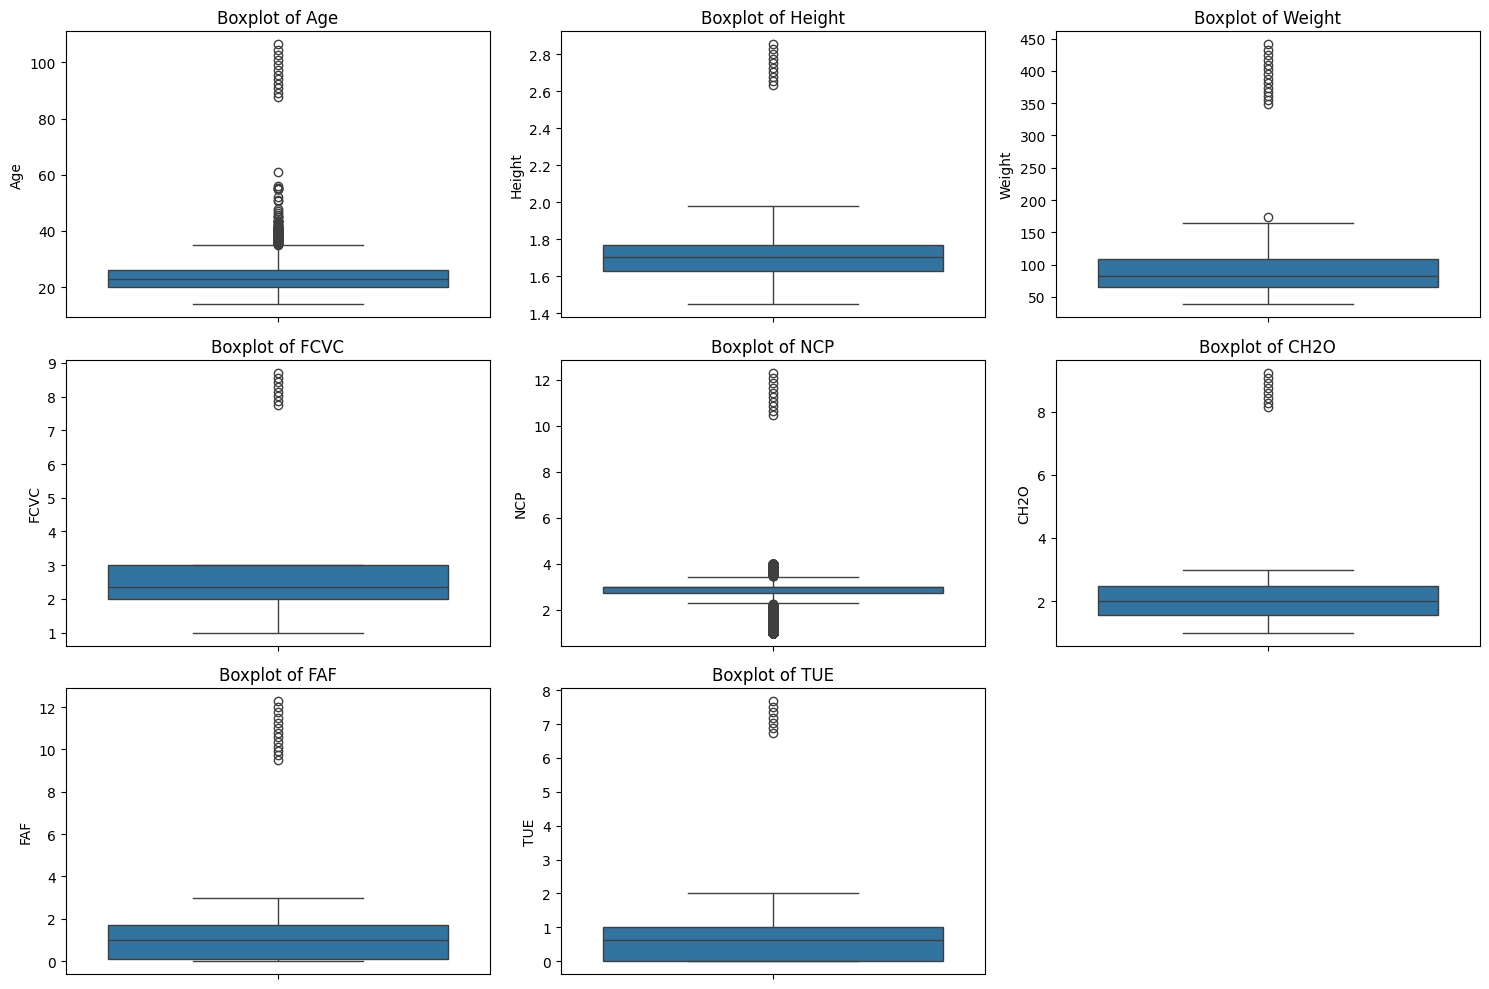

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [17]:

def count_outliers(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)
    return outlier_summary

outliers_before = count_outliers(df, numeric_cols)
print(outliers_before)

{'Age': 161, 'Height': 10, 'Weight': 15, 'FCVC': 8, 'NCP': 504, 'CH2O': 8, 'FAF': 13, 'TUE': 7}


In [18]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()

    # Replace outliers with median
    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

In [19]:
outliers_after = count_outliers(df, numeric_cols)
print(outliers_after)

{'Age': 33, 'Height': 1, 'Weight': 0, 'FCVC': 0, 'NCP': 260, 'CH2O': 0, 'FAF': 0, 'TUE': 0}


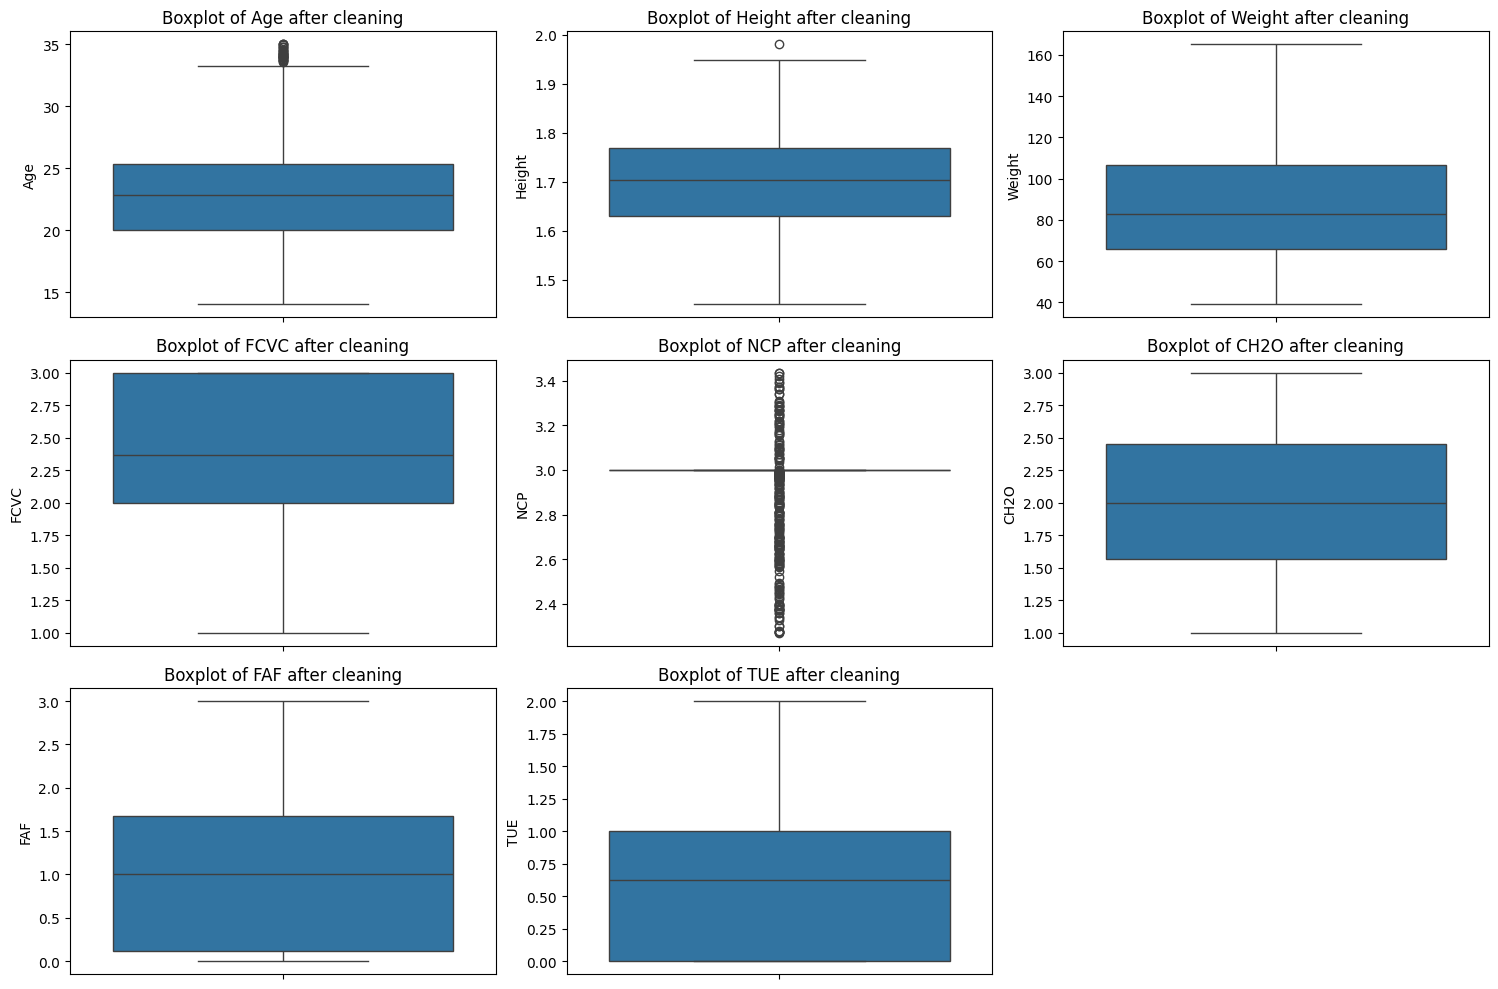

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} after cleaning')
plt.tight_layout()
plt.show()

In [21]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
FAVC: ['no' 'yes']
SCC: ['no' 'yes']
SMOKE: ['no' 'yes']
family_history_with_overweight: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [22]:
from sklearn.preprocessing import LabelEncoder

# Kolom dengan yes/no atau urutan
label_cols = ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CALC', 'CAEC', 'NObeyesdad']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [23]:
print(df.columns)

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [24]:
# Kolom nominal yang masih bertipe object
nominal_cols = ['Gender', 'MTRANS']

# One-hot encode (tanpa drop_first agar lengkap)
df = pd.get_dummies(df, columns=nominal_cols, drop_first=False)


In [25]:
print(df.dtypes)


Age                               float64
Height                            float64
Weight                            float64
CALC                                int64
FAVC                                int64
FCVC                              float64
NCP                               float64
SCC                                 int64
SMOKE                               int64
CH2O                              float64
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
CAEC                                int64
NObeyesdad                          int64
Gender_Female                        bool
Gender_Male                          bool
MTRANS_Automobile                    bool
MTRANS_Bike                          bool
MTRANS_Motorbike                     bool
MTRANS_Public_Transportation         bool
MTRANS_Walking                       bool
dtype: object


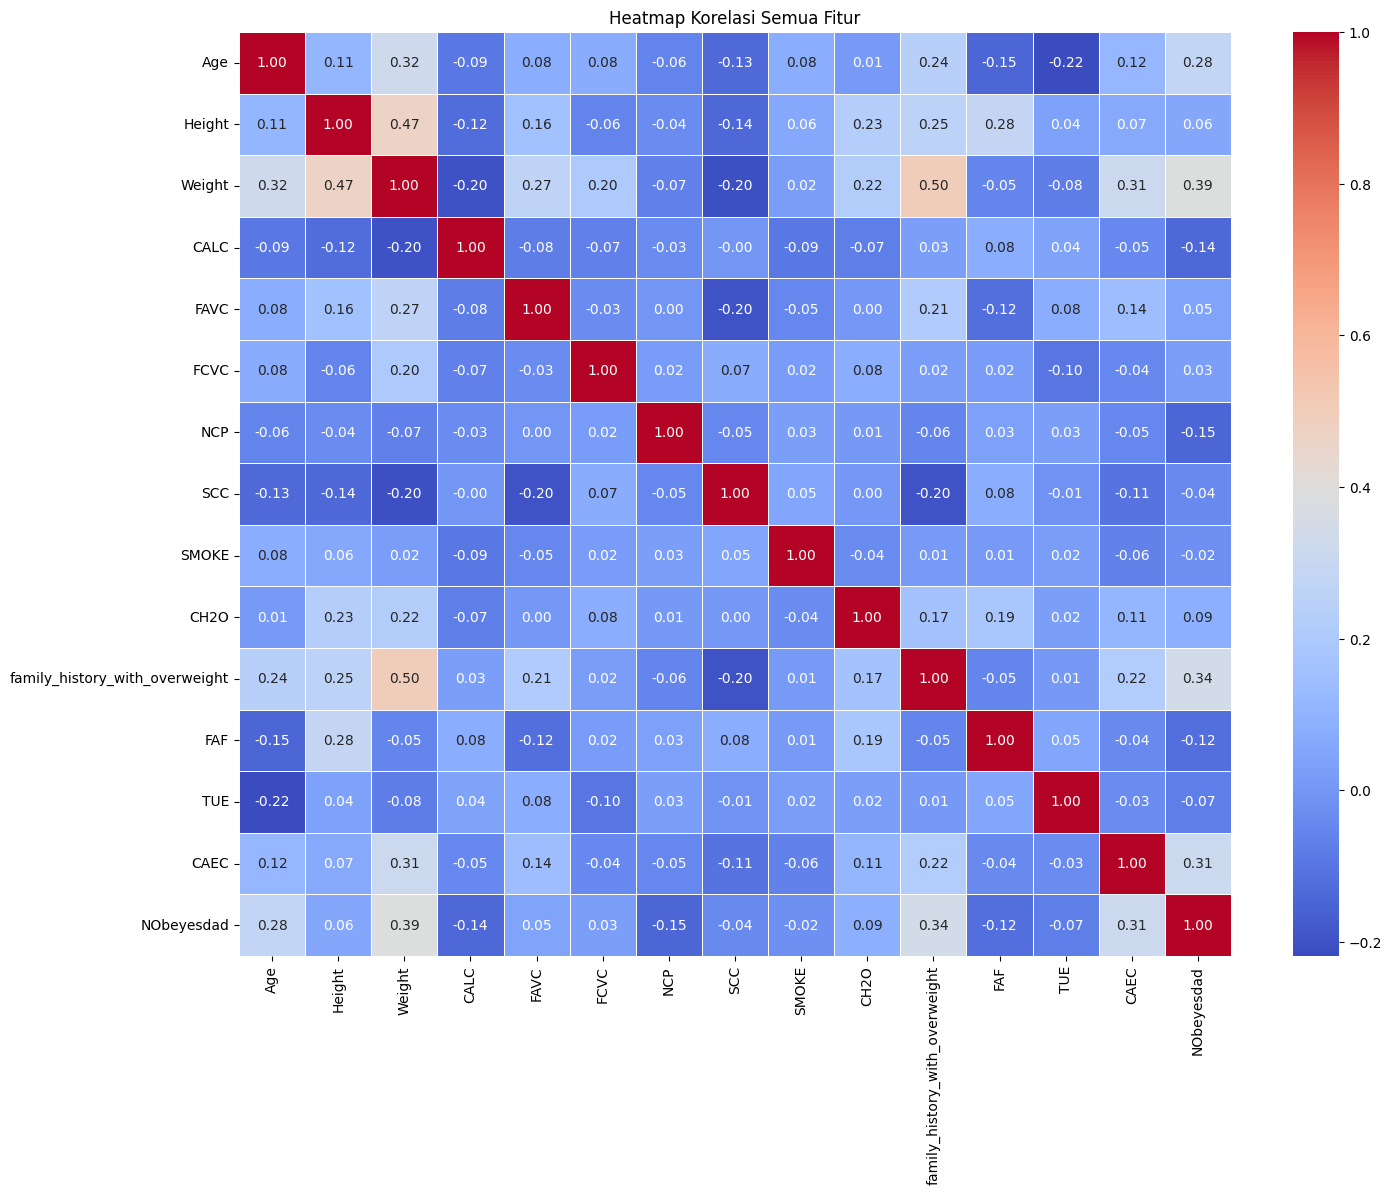

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hanya kolom numerik
num_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(16,12))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Semua Fitur")
plt.show()


In [27]:
correlation_with_target = df.corr()['NObeyesdad'].sort_values(ascending=False)
print(correlation_with_target)


NObeyesdad                        1.000000
Weight                            0.387206
family_history_with_overweight    0.338769
CAEC                              0.312018
Age                               0.276862
CH2O                              0.086569
Height                            0.057291
MTRANS_Automobile                 0.049734
FAVC                              0.046121
Gender_Male                       0.032136
FCVC                              0.029155
MTRANS_Bike                      -0.009667
MTRANS_Public_Transportation     -0.014568
SMOKE                            -0.022045
Gender_Female                    -0.032136
MTRANS_Motorbike                 -0.034318
SCC                              -0.037893
MTRANS_Walking                   -0.071570
TUE                              -0.072936
FAF                              -0.118964
CALC                             -0.139509
NCP                              -0.145061
Name: NObeyesdad, dtype: float64


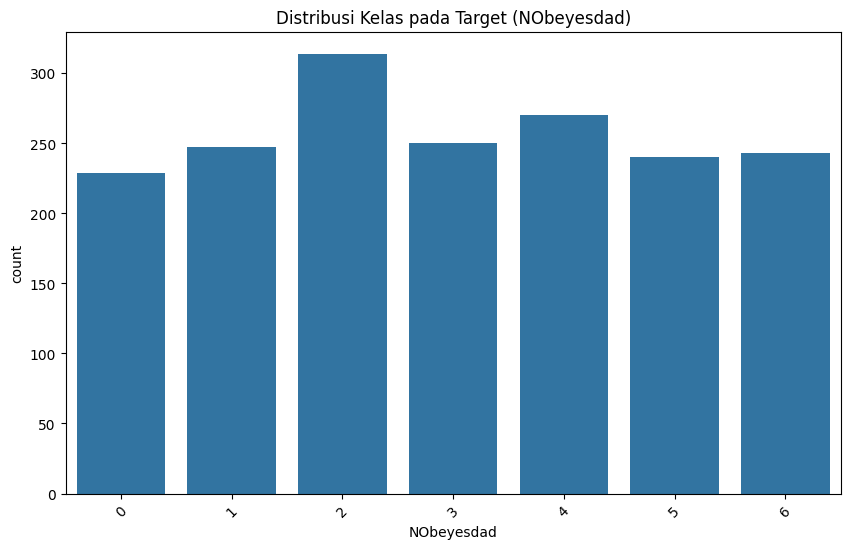

NObeyesdad
2    314
4    270
3    250
1    247
6    243
5    240
0    229
Name: count, dtype: int64


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi label
plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df)
plt.title("Distribusi Kelas pada Target (NObeyesdad)")
plt.xticks(rotation=45)
plt.show()

# Juga tampilkan jumlah per kelas
print(df['NObeyesdad'].value_counts())


In [29]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Ambil kolom numerik saja untuk distandarisasi
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [53]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Model SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        46
           1       0.60      0.49      0.54        49
           2       0.52      0.56      0.54        63
           3       0.65      0.94      0.77        50
           4       0.98      1.00      0.99        54
           5       0.52      0.35      0.42        48
           6       0.63      0.49      0.55        49

    accuracy                           0.66       359
   macro avg       0.66      0.66      0.65       359
weighted avg       0.66      0.66      0.65       359

SVM Accuracy: 0.6629526462395543

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.85      0.82      0.83        49
           2       0.97      0.90      0.93        63
           3       0.89      0.98      0.93        50
           4       1.00      1.00 

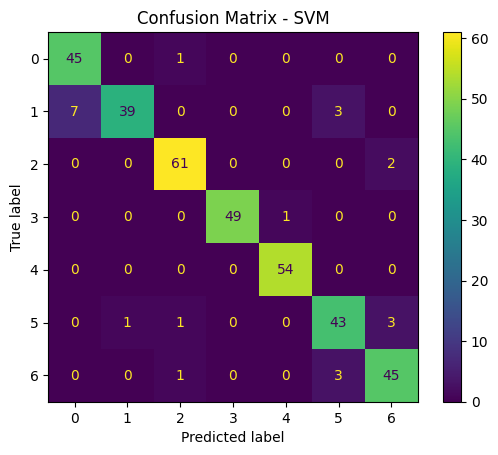

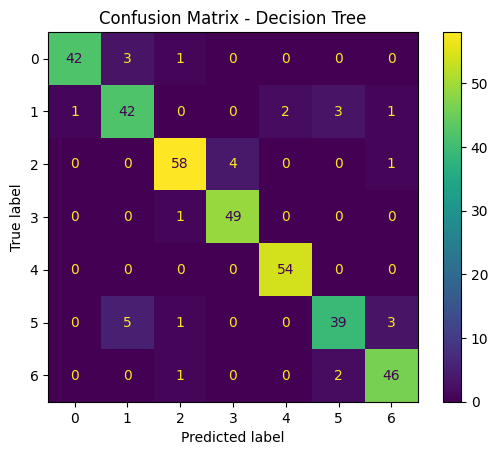

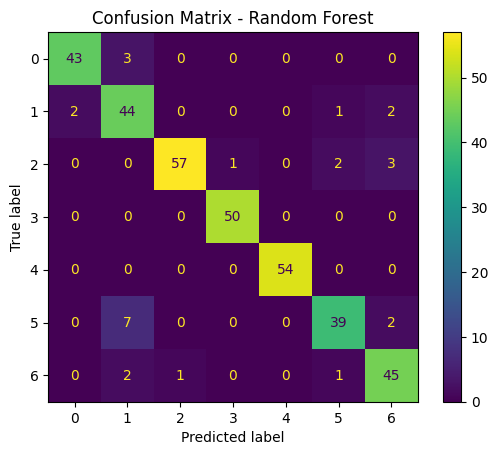

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix SVM
cm_svm = confusion_matrix(y_test, svm_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.show()

# Confusion Matrix Decision Tree
cm_dt = confusion_matrix(y_test, dt_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


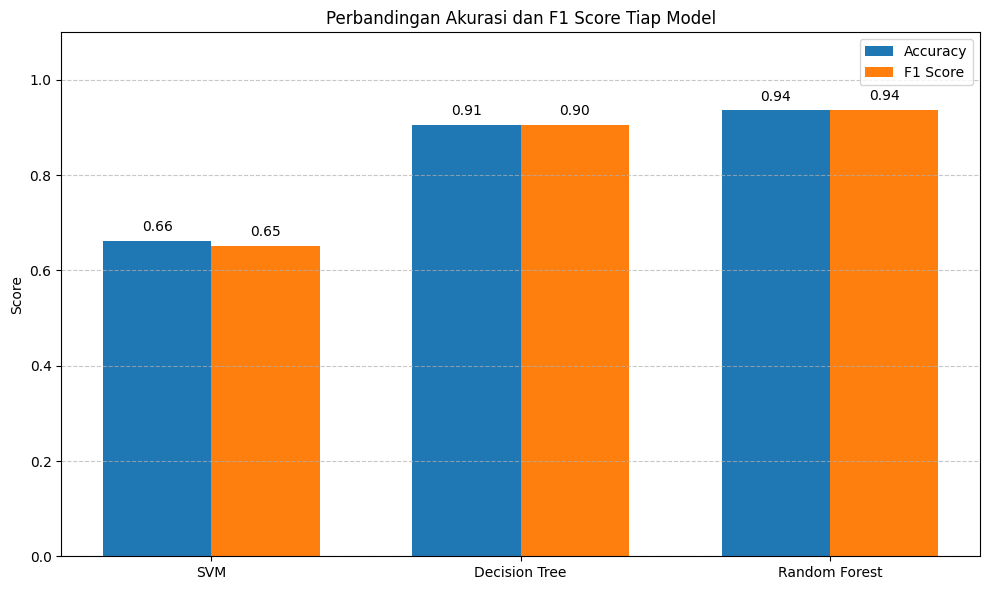

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Hitung skor akurasi dan F1 dari tiap model
accuracy_scores = [
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred)
]

f1_scores = [
    classification_report(y_test, svm_pred, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, dt_pred, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, rf_pred, output_dict=True)['weighted avg']['f1-score'],
]

model_names = ['SVM', 'Decision Tree', 'Random Forest']

# Visualisasi
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
bar2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

# Tambahkan label
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

# Pengaturan tambahan
ax.set_ylabel('Score')
ax.set_title('Perbandingan Akurasi dan F1 Score Tiap Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.1)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#Berdasarkan hasil evaluasi, Random Forest memiliki performa terbaik di antara ketiga model yang diuji dengan akurasi dan F1-score tertinggi.
#SVM memiliki performa terendah, kemungkinan karena parameter default-nya belum optimal. Selanjutnya, dilakukan hyperparameter tuning untuk melihat
#apakah performa masing-masing model masih bisa ditingkatkan.

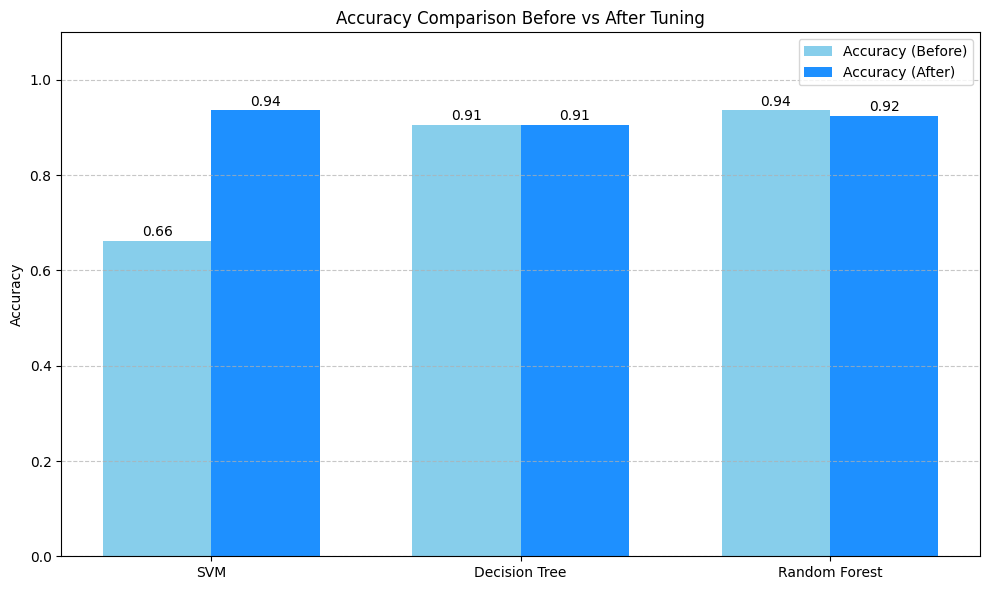

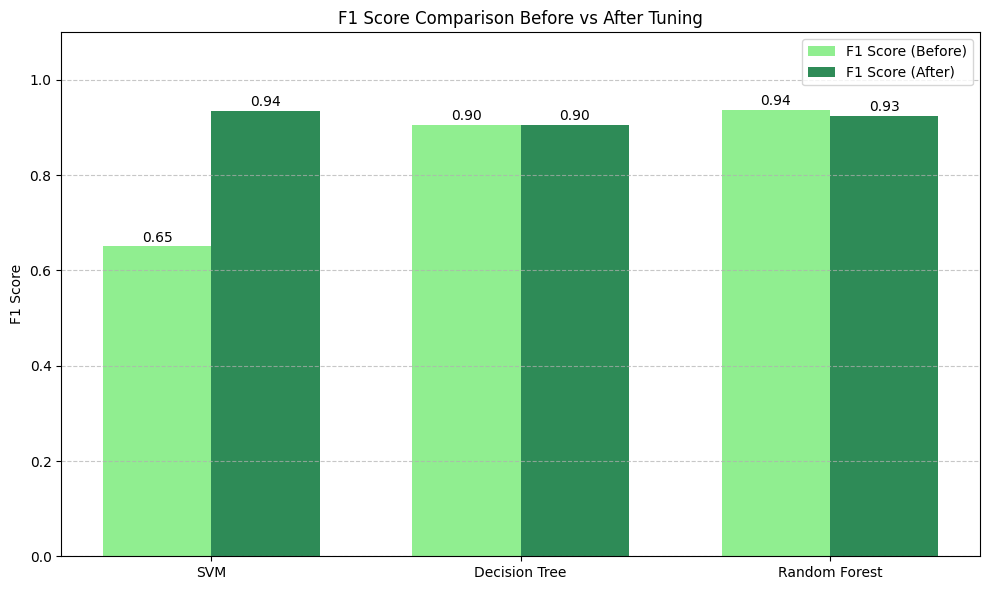

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# ========== 1. Hyperparameter Tuning ==========

# SVM - Grid Search
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Decision Tree - Grid Search
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Random Forest - Random Search
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_iter=10, n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

# ========== 2. Evaluasi ulang model dengan parameter terbaik ==========

# SVM tuned
svm_best = svm_grid.best_estimator_
svm_tuned_pred = svm_best.predict(X_test)

# Decision Tree tuned
dt_best = dt_grid.best_estimator_
dt_tuned_pred = dt_best.predict(X_test)

# Random Forest tuned
rf_best = rf_random.best_estimator_
rf_tuned_pred = rf_best.predict(X_test)

# ========== 3. Komparasi hasil sebelum dan sesudah tuning ==========

# Fungsi bantu ambil metrik
def get_scores(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = classification_report(y_true, y_pred, output_dict=True)['weighted avg']['f1-score']
    return acc, f1

# Sebelum tuning
acc_before = [
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred)
]
f1_before = [
    classification_report(y_test, svm_pred, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, dt_pred, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, rf_pred, output_dict=True)['weighted avg']['f1-score']
]

# Setelah tuning
acc_after = [
    accuracy_score(y_test, svm_tuned_pred),
    accuracy_score(y_test, dt_tuned_pred),
    accuracy_score(y_test, rf_tuned_pred)
]
f1_after = [
    classification_report(y_test, svm_tuned_pred, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, dt_tuned_pred, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, rf_tuned_pred, output_dict=True)['weighted avg']['f1-score']
]

# ========== 4. Visualisasi ==========

model_names = ['SVM', 'Decision Tree', 'Random Forest']
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, acc_before, width, label='Accuracy (Before)', color='skyblue')
bar2 = ax.bar(x + width/2, acc_after, width, label='Accuracy (After)', color='dodgerblue')

# Tambah nilai numerik
for i in range(len(model_names)):
    ax.text(x[i] - width/2, acc_before[i] + 0.01, f'{acc_before[i]:.2f}', ha='center')
    ax.text(x[i] + width/2, acc_after[i] + 0.01, f'{acc_after[i]:.2f}', ha='center')

ax.set_title('Accuracy Comparison Before vs After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.1)
ax.set_ylabel('Accuracy')
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# F1 Score chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, f1_before, width, label='F1 Score (Before)', color='lightgreen')
bar2 = ax.bar(x + width/2, f1_after, width, label='F1 Score (After)', color='seagreen')

for i in range(len(model_names)):
    ax.text(x[i] - width/2, f1_before[i] + 0.01, f'{f1_before[i]:.2f}', ha='center')
    ax.text(x[i] + width/2, f1_after[i] + 0.01, f'{f1_after[i]:.2f}', ha='center')

ax.set_title('F1 Score Comparison Before vs After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.1)
ax.set_ylabel('F1 Score')
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


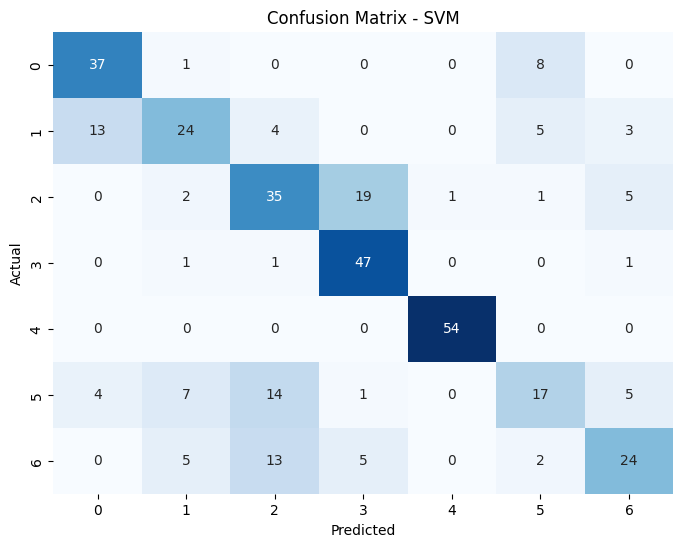

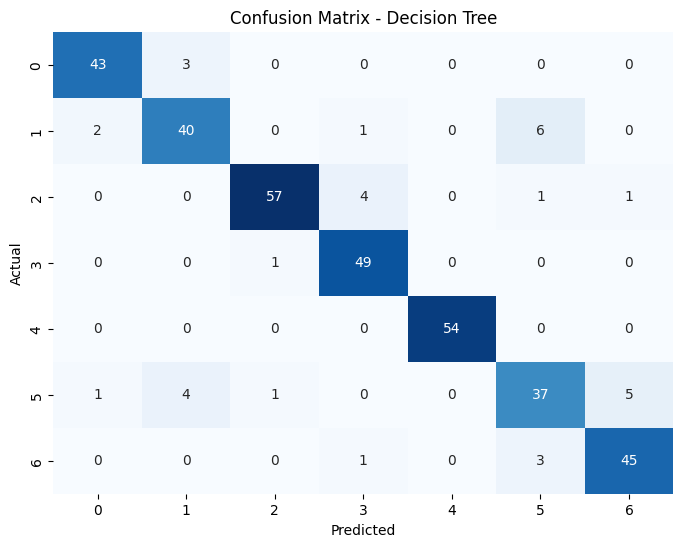

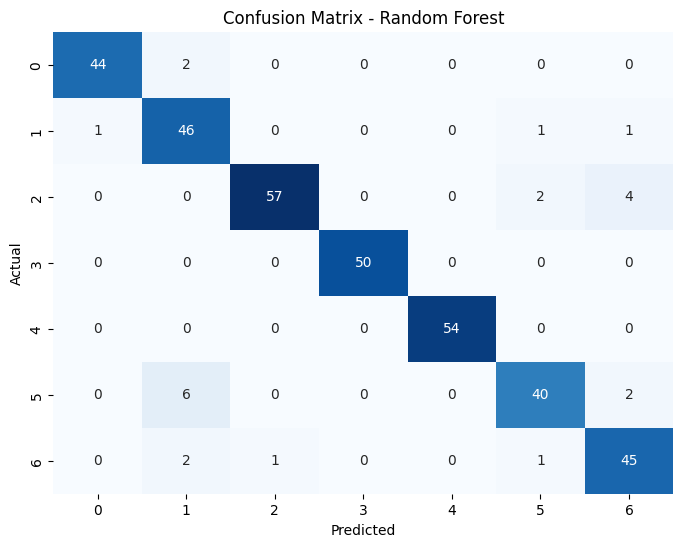

In [34]:
# Visualisasi Confusion Matrix SVM
plot_conf_matrix(y_test, svm_pred, 'SVM')

# Visualisasi Confusion Matrix Decision Tree
plot_conf_matrix(y_test, dt_pred, 'Decision Tree')

# Visualisasi Confusion Matrix Random Forest
plot_conf_matrix(y_test, rf_pred, 'Random Forest')


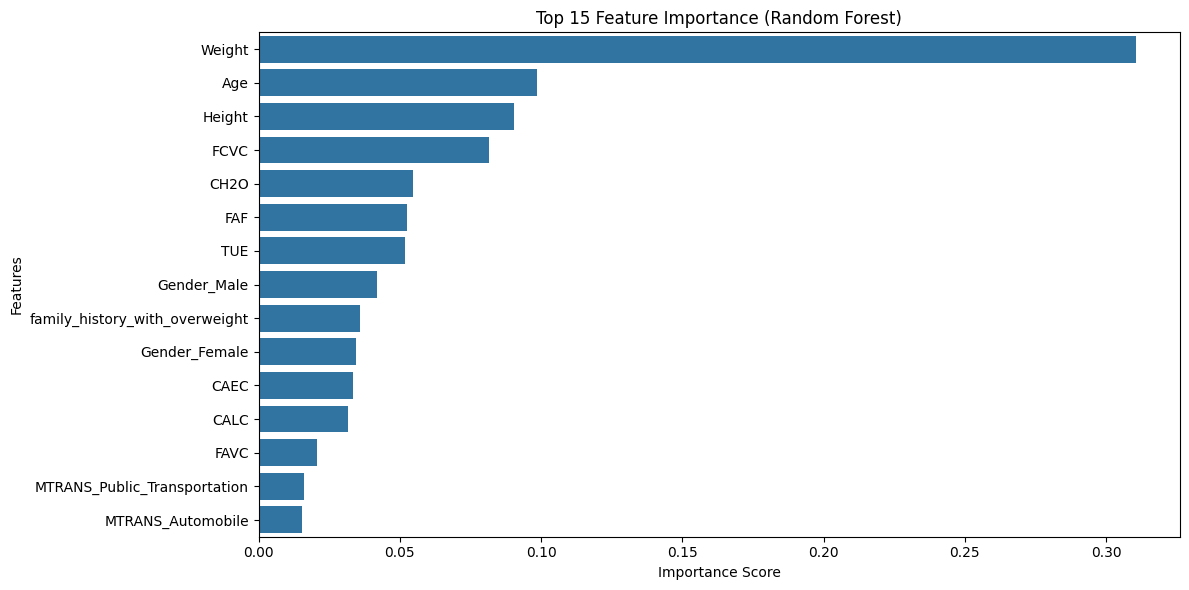

In [37]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance[:15], y=feat_importance.index[:15])
plt.title("Top 15 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

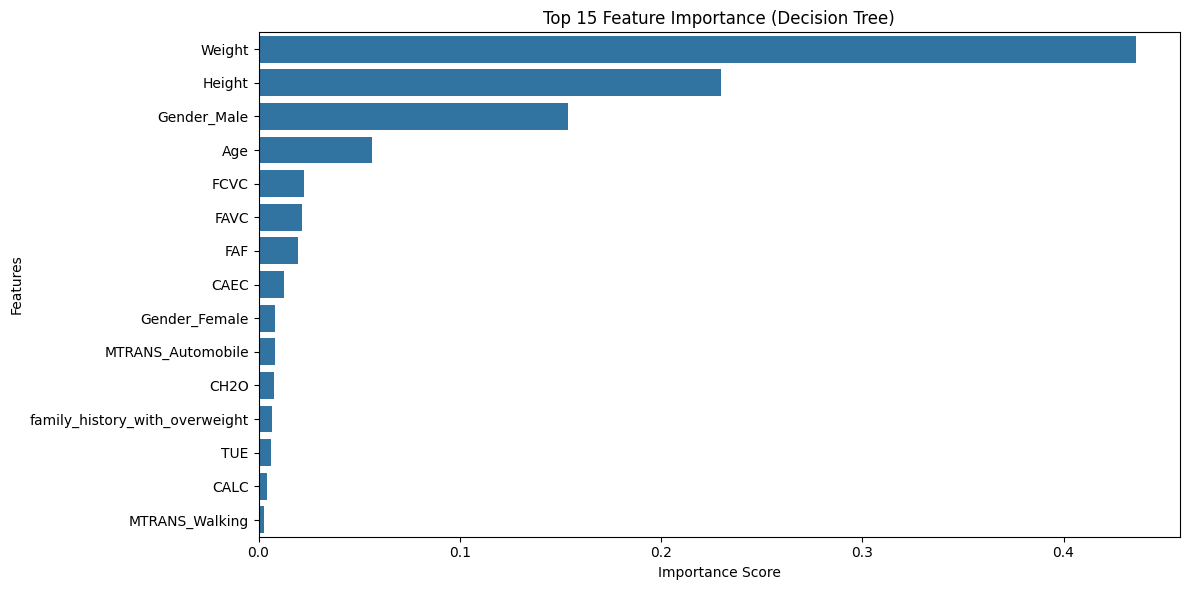

In [39]:
importances = dt_model.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance[:15], y=feat_importance.index[:15])
plt.title("Top 15 Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

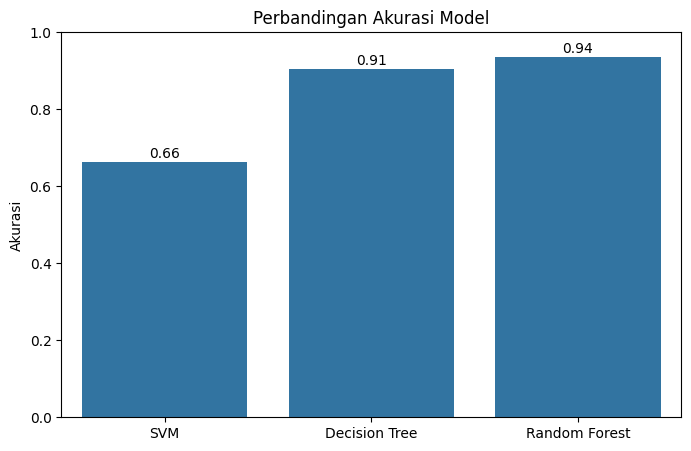

In [41]:
models = ['SVM', 'Decision Tree', 'Random Forest']
accuracies = [0.6629526462395543,0.9052924791086351, 0.935933147632312]  # ganti dengan skor asli dari masing-masing modelmu

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best Parameters - SVM:", grid_svm.best_params_)
print("Best Accuracy - SVM:", grid_svm.best_score_)

best_svm = grid_svm.best_estimator_

Best Parameters - SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy - SVM: 0.9176945006213298


In [43]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best Parameters - Decision Tree:", grid_dt.best_params_)
print("Best Accuracy - DT:", grid_dt.best_score_)

best_dt = grid_dt.best_estimator_


Best Parameters - Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best Accuracy - DT: 0.9337418678882095


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    "SVM (Tuned)": best_svm,
    "Decision Tree (Tuned)": best_dt,
    "Random Forest (Tuned)": best_rf
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



SVM (Tuned)
Accuracy: 0.935933147632312
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        46
           1       0.97      0.80      0.88        49
           2       0.95      0.97      0.96        63
           3       1.00      0.98      0.99        50
           4       0.98      1.00      0.99        54
           5       0.88      0.90      0.89        48
           6       0.90      0.92      0.91        49

    accuracy                           0.94       359
   macro avg       0.94      0.93      0.93       359
weighted avg       0.94      0.94      0.94       359

Confusion Matrix:
 [[45  0  1  0  0  0  0]
 [ 7 39  0  0  0  3  0]
 [ 0  0 61  0  0  0  2]
 [ 0  0  0 49  1  0  0]
 [ 0  0  0  0 54  0  0]
 [ 0  1  1  0  0 43  3]
 [ 0  0  1  0  0  3 45]]

Decision Tree (Tuned)
Accuracy: 0.9136490250696379
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1 

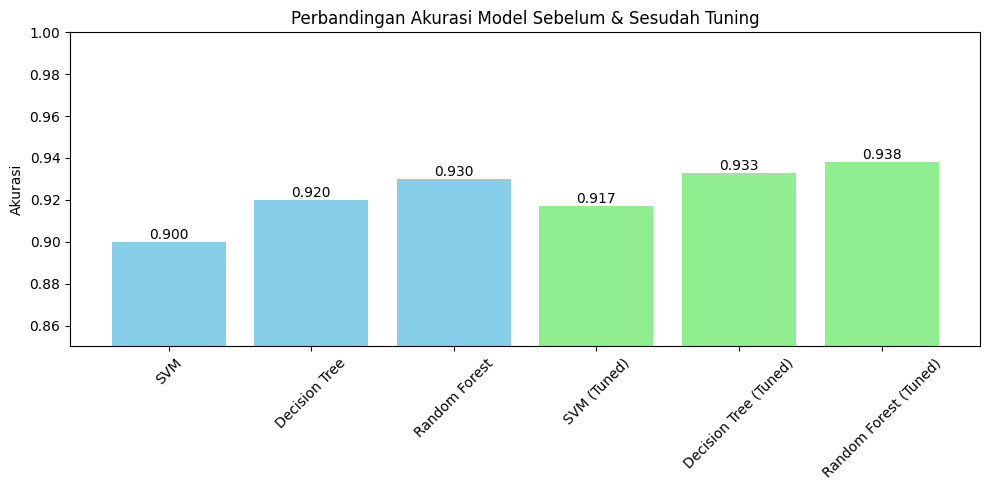

In [49]:
acc_before = {
    "SVM": 0.90,
    "Decision Tree": 0.92,
    "Random Forest": 0.93
}

acc_after = {
    "SVM (Tuned)": 0.917,
    "Decision Tree (Tuned)": 0.933,
    "Random Forest (Tuned)": 0.938
}

# Gabungkan untuk plot
labels = list(acc_before.keys()) + list(acc_after.keys())
scores = list(acc_before.values()) + list(acc_after.values())

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, scores, color=['skyblue']*3 + ['lightgreen']*3)
plt.ylim(0.85, 1)
plt.title("Perbandingan Akurasi Model Sebelum & Sesudah Tuning")
plt.ylabel("Akurasi")
plt.xticks(rotation=45)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), f'{bar.get_height():.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [44]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Parameters - Random Forest:", grid_rf.best_params_)
print("Best Accuracy - RF:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_


Best Parameters - Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy - RF: 0.9386101703174875


In [45]:
from sklearn.metrics import classification_report

# ----- SVM -----
svm_best = SVC(**grid_svm.best_params_)
svm_best.fit(X_train, y_train)
svm_pred = svm_best.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# ----- Decision Tree -----
dt_best = DecisionTreeClassifier(**grid_dt.best_params_)
dt_best.fit(X_train, y_train)
dt_pred = dt_best.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

# ----- Random Forest -----
rf_best = RandomForestClassifier(**grid_rf.best_params_)
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        46
           1       0.97      0.80      0.88        49
           2       0.95      0.97      0.96        63
           3       1.00      0.98      0.99        50
           4       0.98      1.00      0.99        54
           5       0.88      0.90      0.89        48
           6       0.90      0.92      0.91        49

    accuracy                           0.94       359
   macro avg       0.94      0.93      0.93       359
weighted avg       0.94      0.94      0.94       359

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.84      0.86      0.85        49
           2       0.94      0.92      0.93        63
           3       0.92      0.98      0.95        50
           4       0.96      1.00      0.98        54
           5

In [46]:
from sklearn.metrics import accuracy_score

acc_svm_after = accuracy_score(y_test, svm_pred)
acc_dt_after = accuracy_score(y_test, dt_pred)
acc_rf_after = accuracy_score(y_test, rf_pred)

print(f"Akurasi Setelah Tuning - SVM: {acc_svm_after}")
print(f"Akurasi Setelah Tuning - Decision Tree: {acc_dt_after}")
print(f"Akurasi Setelah Tuning - Random Forest: {acc_rf_after}")

Akurasi Setelah Tuning - SVM: 0.935933147632312
Akurasi Setelah Tuning - Decision Tree: 0.9192200557103064
Akurasi Setelah Tuning - Random Forest: 0.924791086350975
